In [1]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import random
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
filename = "training.csv"
df = pd.read_csv(filename, index_col=False )

In [4]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


###### We have 30 features

In [5]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

We have no null or NaN values in the data set. 

In [6]:
duplicate = df[df.duplicated()]

In [7]:
duplicate

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label


There are no duplicate records 

In [8]:
df=df.drop(['EventId'],axis=1)

In [9]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

We would need to perform encoding for target column

In [11]:
df.Label.unique()

array(['s', 'b'], dtype=object)

In [12]:
df.DER_sum_pt.unique()

array([197.76 , 125.157, 197.814, ..., 610.482, 242.586,  55.892])

In [13]:
df.DER_pt_ratio_lep_tau.unique()

array([1.582, 0.879, 3.776, ..., 5.388, 7.916, 6.579])

In [14]:
df.PRI_met_sumet.unique()

array([258.733, 164.546, 260.414, ..., 144.665,  80.408,  99.405])

In [15]:
df.PRI_jet_num.unique()

array([2, 1, 0, 3], dtype=int64)

In [16]:
df.Weight.unique()

array([2.65331134e-03, 2.23358449e+00, 2.34738894e+00, ...,
       4.50508350e+00, 2.49725933e+00, 1.87747381e+00])

There are two classes:


In [17]:
Label_mapping = {
    's'  : 0,
    'b' : 1
}

df['Label'] = df['Label'].map(Label_mapping)

Text(0.5, 1.0, 'Target Distribution')

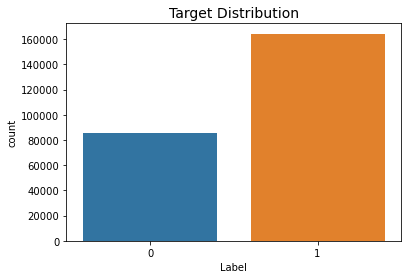

In [18]:
sns.countplot(df['Label'])
plt.title("Target Distribution", fontsize=14)

Background:1
Signal:0
The dataset is not balanced. 
Background is major class.


<AxesSubplot:>

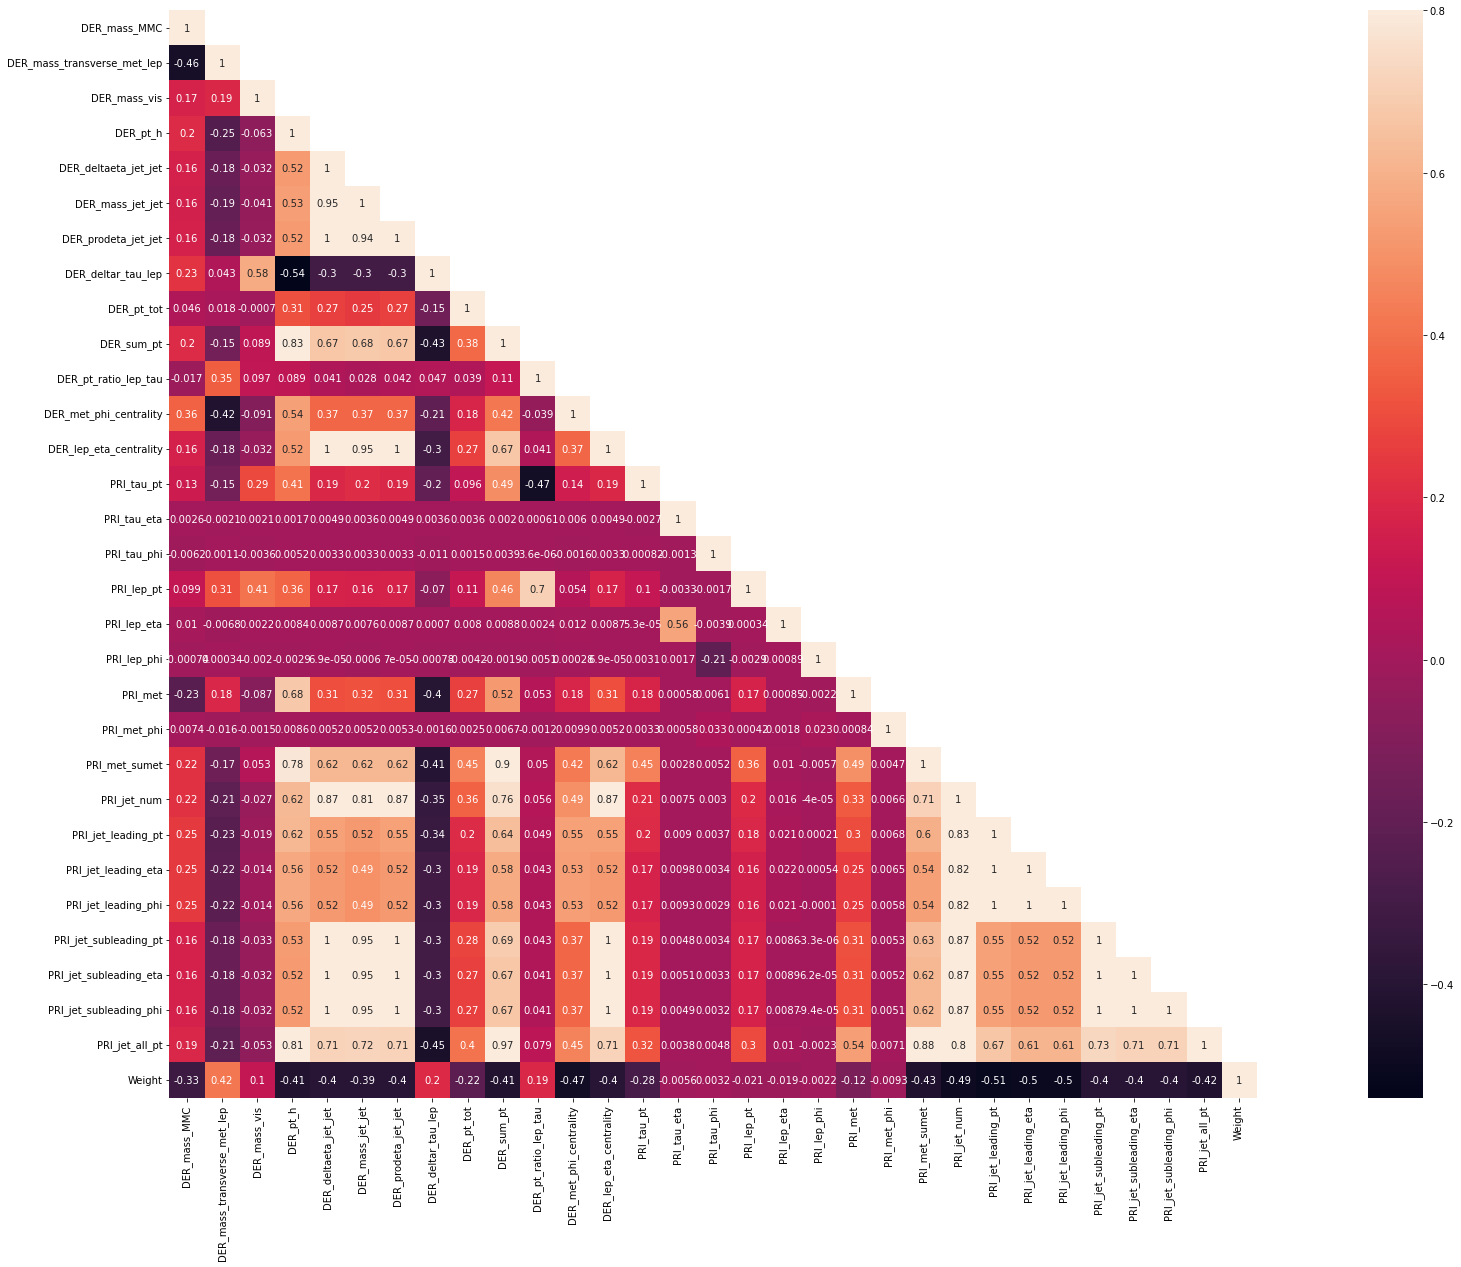

In [19]:
corrMatt = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 
                     'DER_prodeta_jet_jet',  'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
               'DER_lep_eta_centrality', 'PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi',
              'PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi',
              'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt','Weight']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [20]:
feat = ['DER_mass_MMC', 'DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 
                     'DER_prodeta_jet_jet',  'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
                'PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi',
              'PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num',
              'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt','Weight']

###### From the corelation matrix we obsereved that following features are highly corelated to another crucial features so we will drop those.
'PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','DER_lep_eta_centrality'

In [21]:
train = df.iloc[:174999]
test = df.iloc[174999:]


In [22]:
print(feat)

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']


In [23]:
Target = 'Label'

###### Missing records are marked as -999



Text(0.5, 1.0, 'PRI Jet Num Distribution')

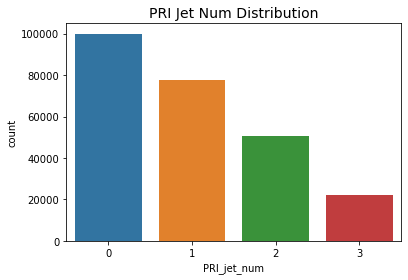

In [24]:
sns.countplot(df['PRI_jet_num'])
plt.title("PRI Jet Num Distribution", fontsize=14)

**PRI_jet_num indicates missing data 
0: features related to jets were all missing data
1: features related to primary jets were no longer missing data, but those related to 2 or more jets were still missing
2 or more jets: all features related to jets contained data**

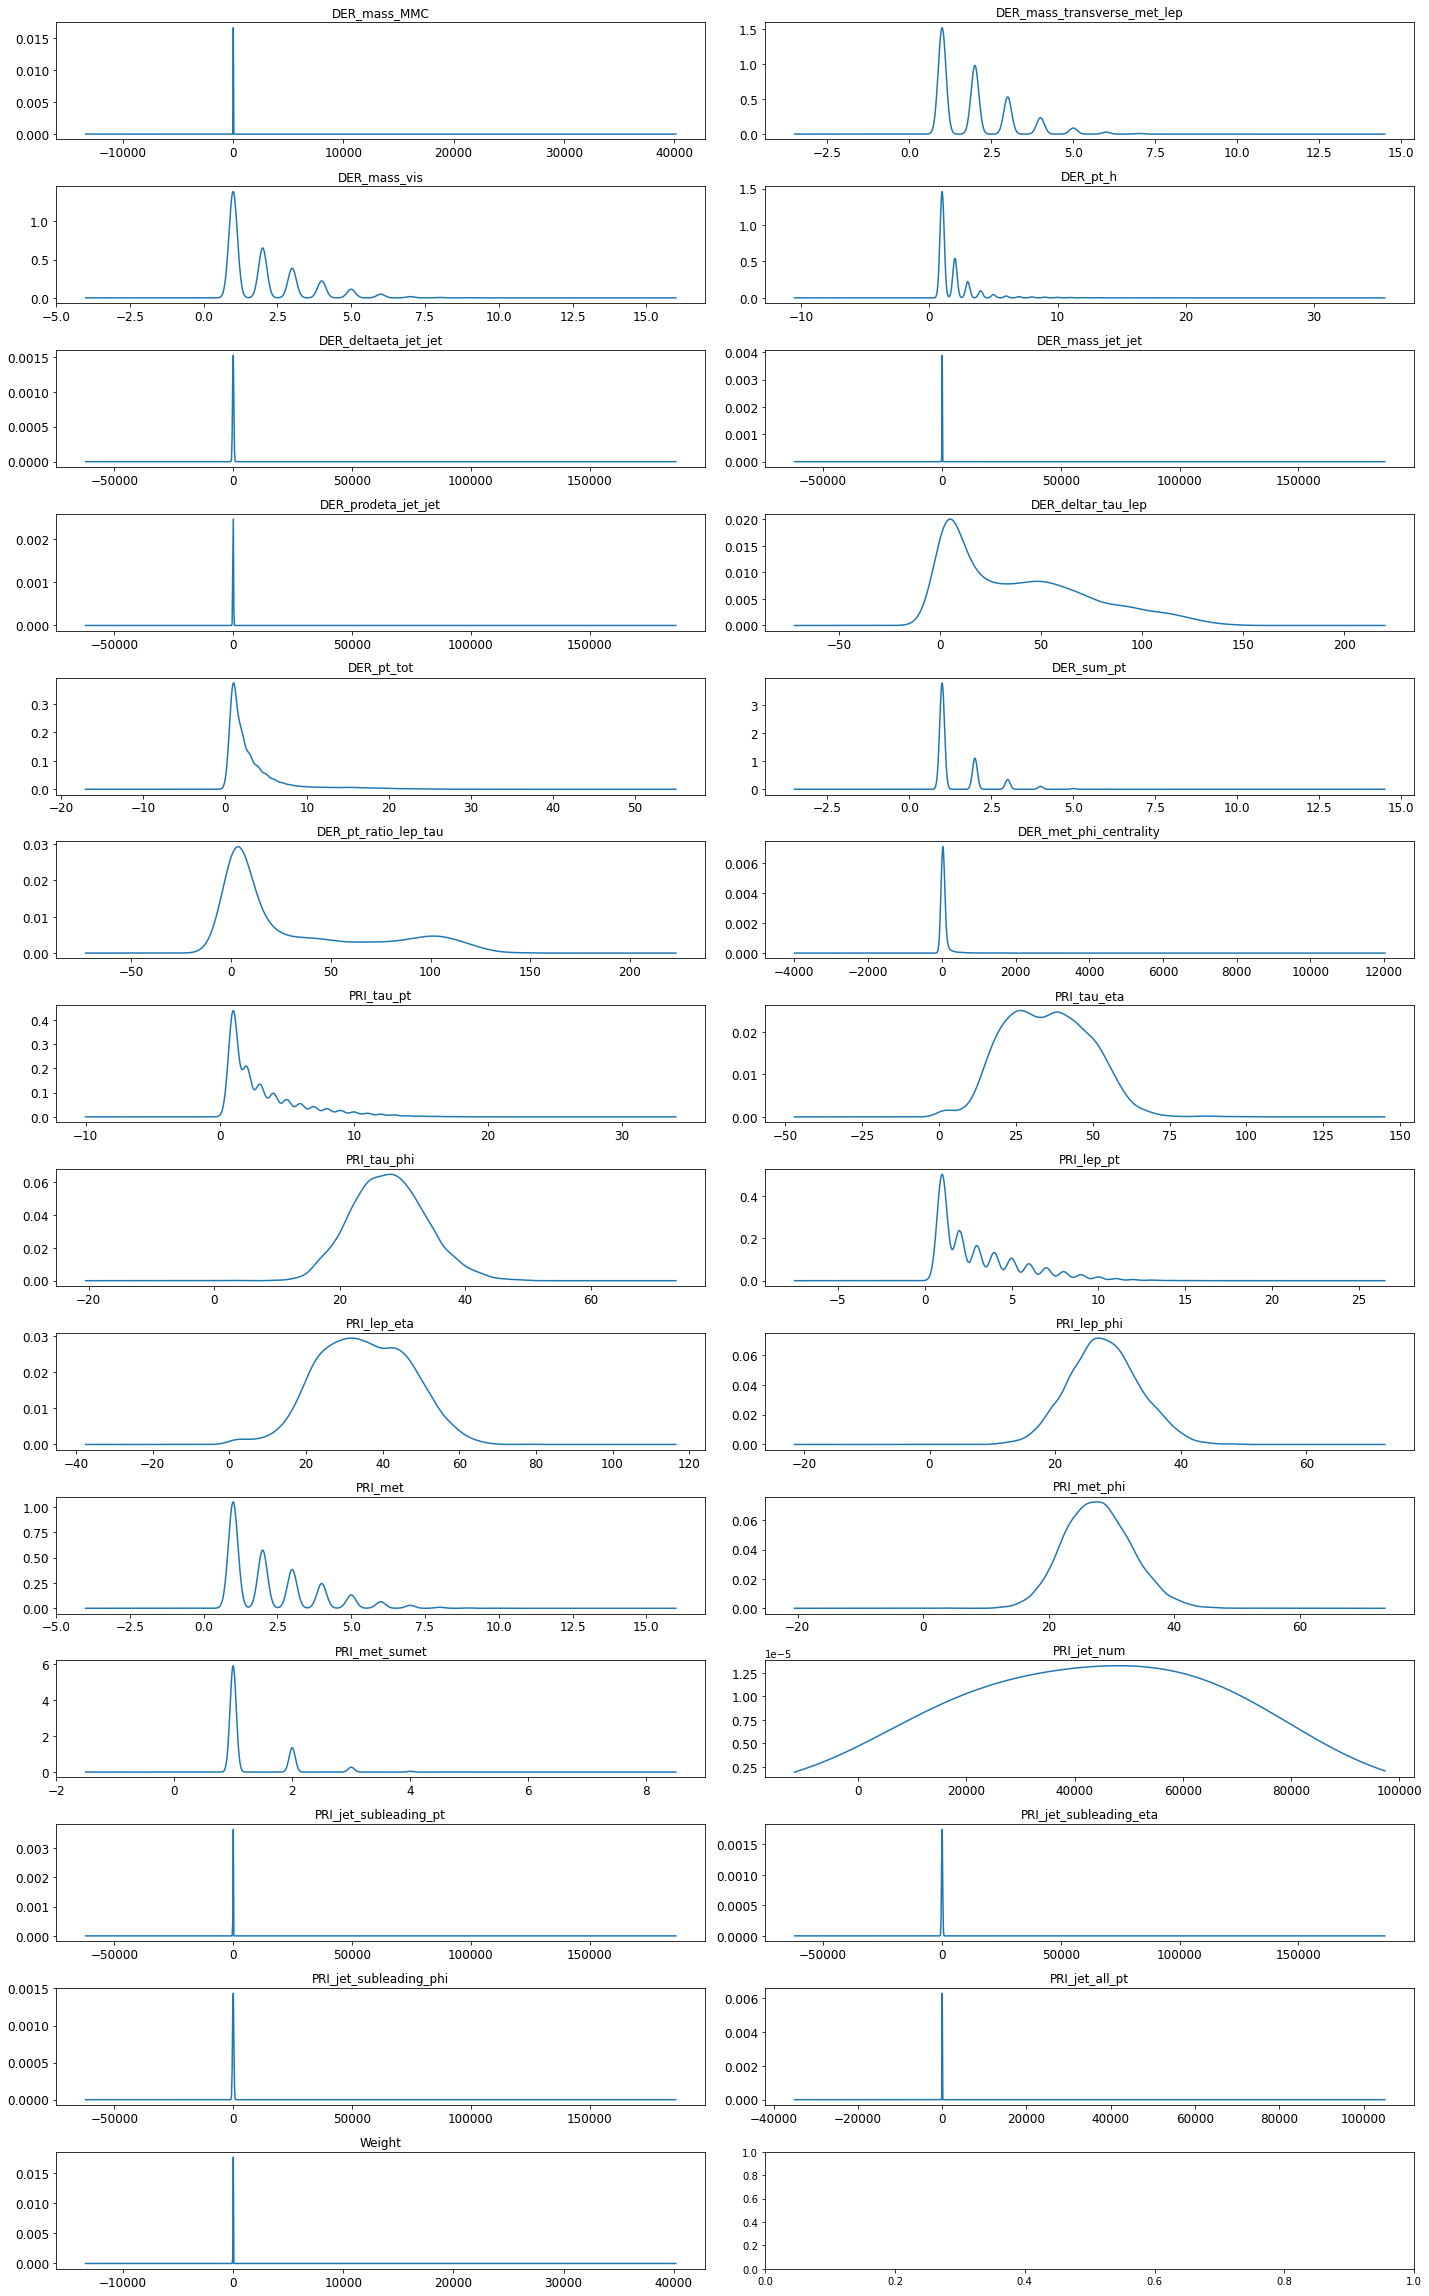

In [25]:
fig, axes = plt.subplots(14, 2, figsize=(20, 32))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[feat]):
    train[c].value_counts()[::-1].plot(kind = 'kde', ax=axes[i], title=c, fontsize=12)
    axes[i].set_ylabel('')
    
plt.tight_layout()

Majority of the data are missing and imputed with -999. We will not treat them as outliers. 

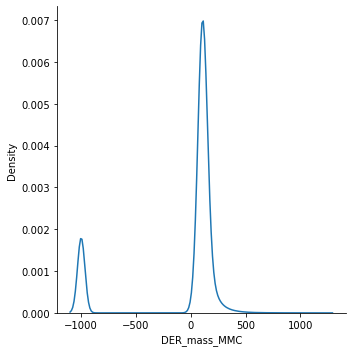

In [26]:
sns.displot(df, x="DER_mass_MMC", kind="kde")

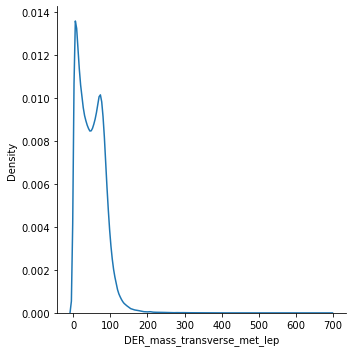

In [27]:
sns.displot(df, x="DER_mass_transverse_met_lep", kind="kde")

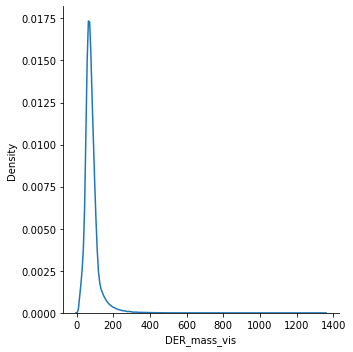

In [28]:
sns.displot(df, x="DER_mass_vis", kind="kde")

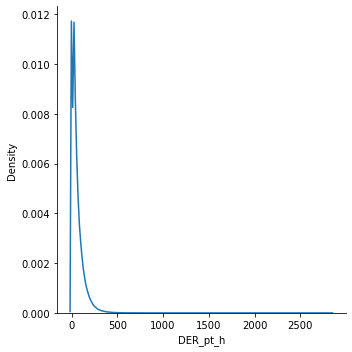

In [29]:
sns.displot(df, x="DER_pt_h", kind="kde")

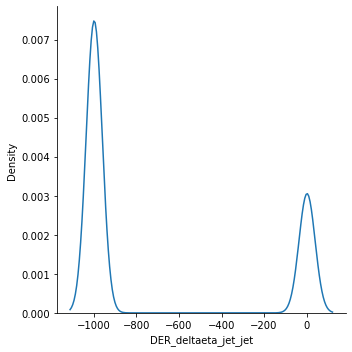

In [30]:
sns.displot(df, x="DER_deltaeta_jet_jet", kind="kde")

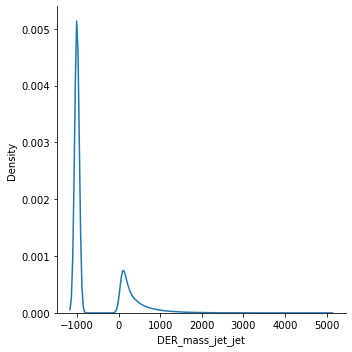

In [31]:
sns.displot(df, x="DER_mass_jet_jet", kind="kde")

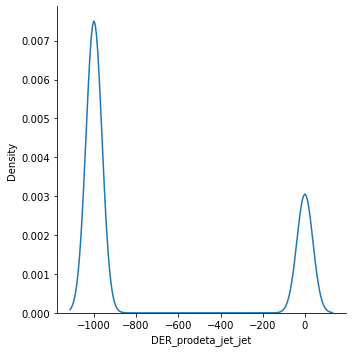

In [32]:
sns.displot(df, x="DER_prodeta_jet_jet", kind="kde")

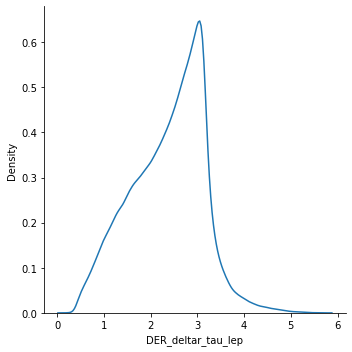

In [33]:
sns.displot(df, x="DER_deltar_tau_lep", kind="kde")

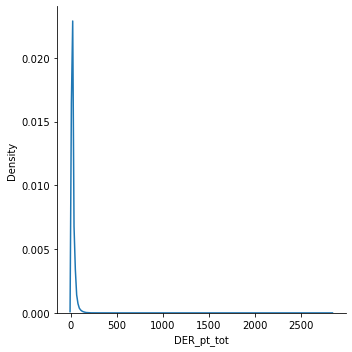

In [34]:
sns.displot(df, x="DER_pt_tot", kind="kde")

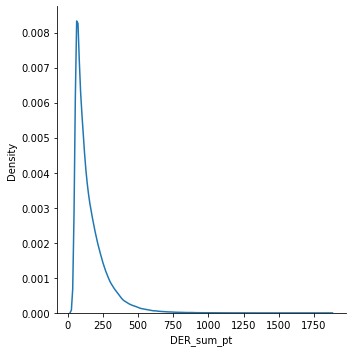

In [35]:
sns.displot(df, x="DER_sum_pt", kind="kde")

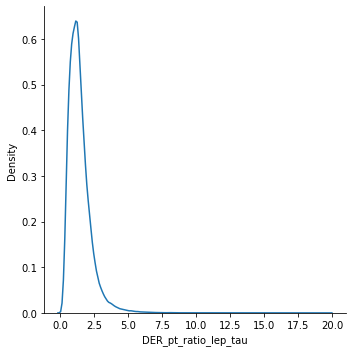

In [36]:
sns.displot(df, x="DER_pt_ratio_lep_tau", kind="kde")

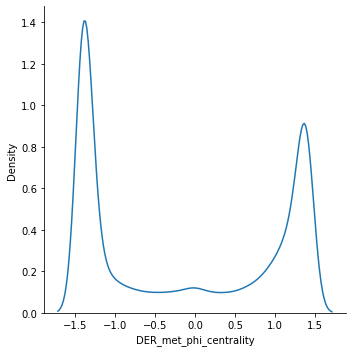

In [37]:
sns.displot(df, x="DER_met_phi_centrality", kind="kde")

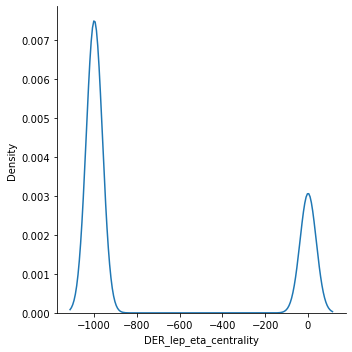

In [38]:
sns.displot(df, x="DER_lep_eta_centrality", kind="kde")

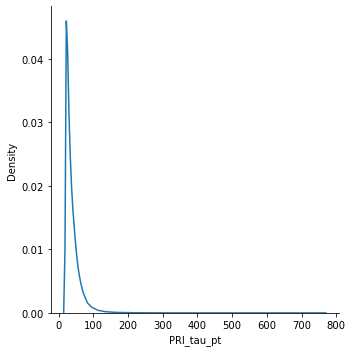

In [39]:
sns.displot(df, x="PRI_tau_pt", kind="kde")

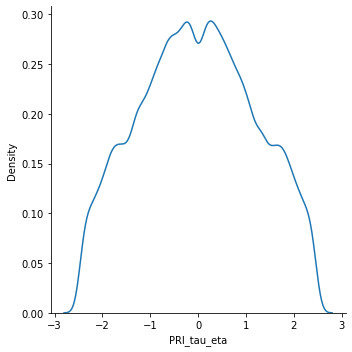

In [40]:
sns.displot(df, x="PRI_tau_eta", kind="kde")

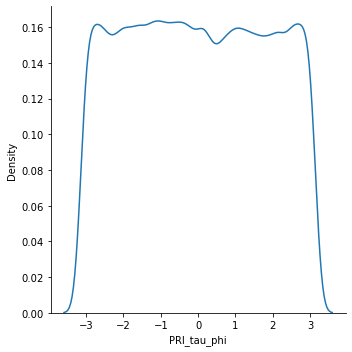

In [41]:
sns.displot(df, x="PRI_tau_phi", kind="kde")

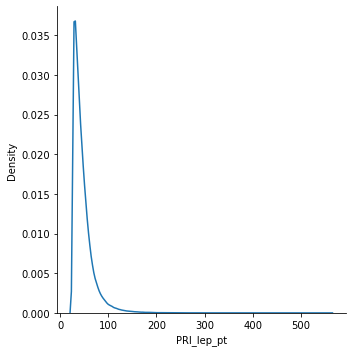

In [42]:
sns.displot(df, x="PRI_lep_pt", kind="kde")

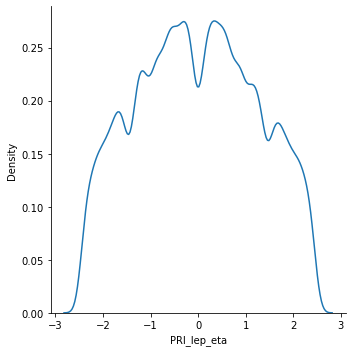

In [43]:
sns.displot(df, x="PRI_lep_eta", kind="kde")

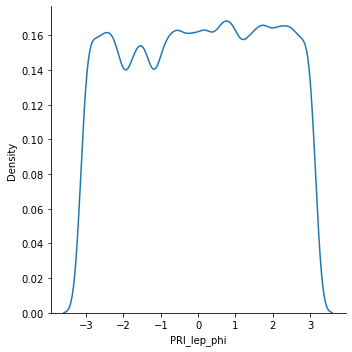

In [44]:
sns.displot(df, x="PRI_lep_phi", kind="kde")

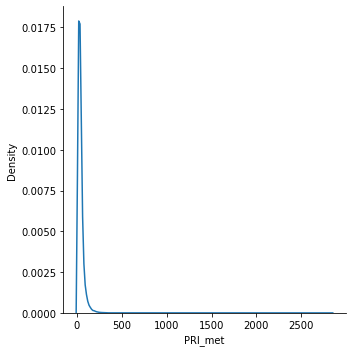

In [45]:
sns.displot(df, x="PRI_met", kind="kde")

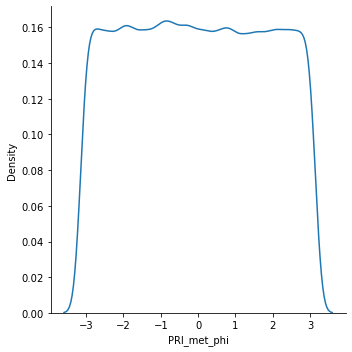

In [46]:
sns.displot(df, x="PRI_met_phi", kind="kde")

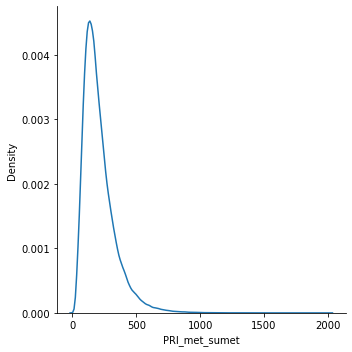

In [47]:
sns.displot(df, x="PRI_met_sumet", kind="kde")

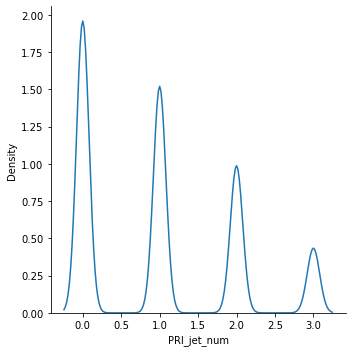

In [48]:
sns.displot(df, x="PRI_jet_num", kind="kde")

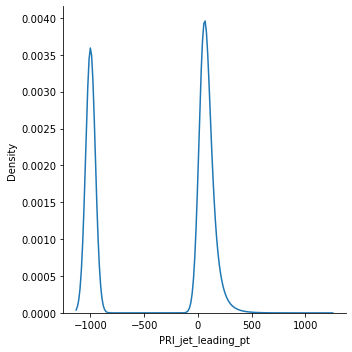

In [49]:
sns.displot(df, x="PRI_jet_leading_pt", kind="kde")

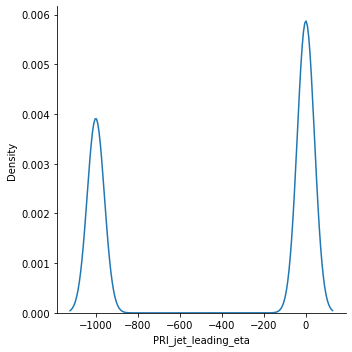

In [50]:
sns.displot(df, x="PRI_jet_leading_eta", kind="kde")

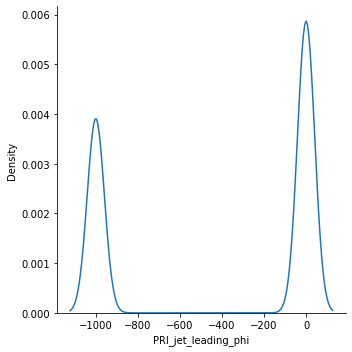

In [51]:
sns.displot(df, x="PRI_jet_leading_phi", kind="kde")

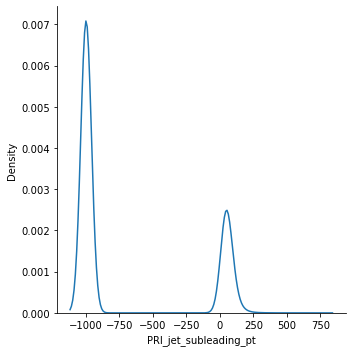

In [52]:
sns.displot(df, x="PRI_jet_subleading_pt", kind="kde")

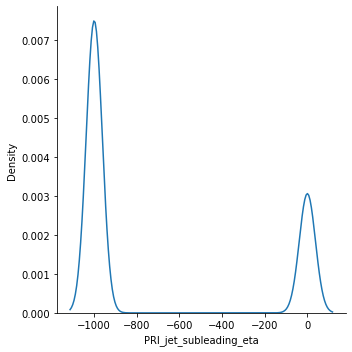

In [53]:
sns.displot(df, x="PRI_jet_subleading_eta", kind="kde")

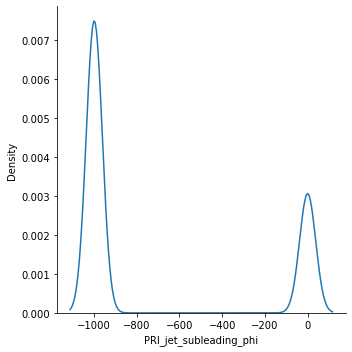

In [54]:
sns.displot(df, x="PRI_jet_subleading_phi", kind="kde")

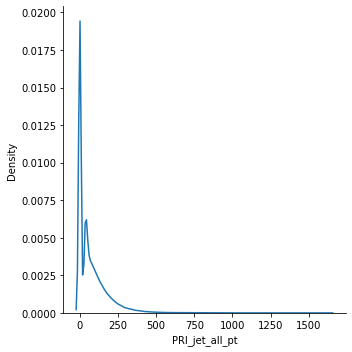

In [55]:
sns.displot(df, x="PRI_jet_all_pt", kind="kde")

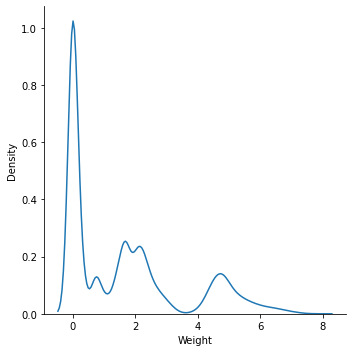

In [56]:
sns.displot(df, x="Weight", kind="kde")

We have used subplots for 31 columns... we can also plot the distribution graphs individually..I have chosen to visualize the density plots individually to observe the kind of skewness and perform appropriate transformations 

### Performing transformation

As we have mostly right skewed data we will perform log transform

In [57]:
df['DER_mass_MMC'] = np.log(df['DER_mass_MMC'])

In [58]:
df['DER_mass_transverse_met_lep'] = np.log(df['DER_mass_transverse_met_lep'])

In [59]:
df['DER_mass_vis'] = np.log(df['DER_mass_vis'])

In [60]:
df['DER_pt_h'] = np.log(df['DER_pt_h'])

In [61]:
df['DER_deltaeta_jet_jet'] = np.log(df['DER_deltaeta_jet_jet'])

In [62]:
df['DER_mass_jet_jet'] = np.log(df['DER_mass_jet_jet'])

In [63]:
df['DER_prodeta_jet_jet'] = np.log(df['DER_prodeta_jet_jet'])

In [64]:
df['DER_deltar_tau_lep'] = np.log(df['DER_deltar_tau_lep'])

In [65]:
df['DER_pt_tot'] = np.log(df['DER_pt_tot'])

In [66]:
df['DER_sum_pt'] = np.log(df['DER_sum_pt'])

In [67]:
df['DER_pt_ratio_lep_tau'] = np.log(df['DER_pt_ratio_lep_tau'])

In [68]:
df['DER_met_phi_centrality'] = np.log(df['DER_met_phi_centrality'])

In [69]:
df['PRI_tau_pt'] = np.log(df['PRI_tau_pt'])

In [70]:
df['PRI_tau_eta'] = np.log(df['PRI_tau_eta'])

In [71]:
df['PRI_tau_phi'] = np.log(df['PRI_tau_phi'])

In [72]:
df['PRI_lep_pt'] = np.log(df['PRI_lep_pt'])

In [73]:
df['PRI_lep_eta'] = np.log(df['PRI_lep_eta'])

In [74]:
df['PRI_lep_phi'] = np.log(df['PRI_lep_phi'])

In [75]:
df['PRI_met'] = np.log(df['PRI_met'])

In [76]:
df['PRI_met_phi'] = np.log(df['PRI_met_phi'])

In [77]:
df['PRI_met_sumet'] = np.log(df['PRI_met_sumet'])

In [78]:
df['PRI_jet_all_pt'] = np.log(df['PRI_jet_all_pt'])

In [79]:
df['Weight'] = np.log(df['Weight'])

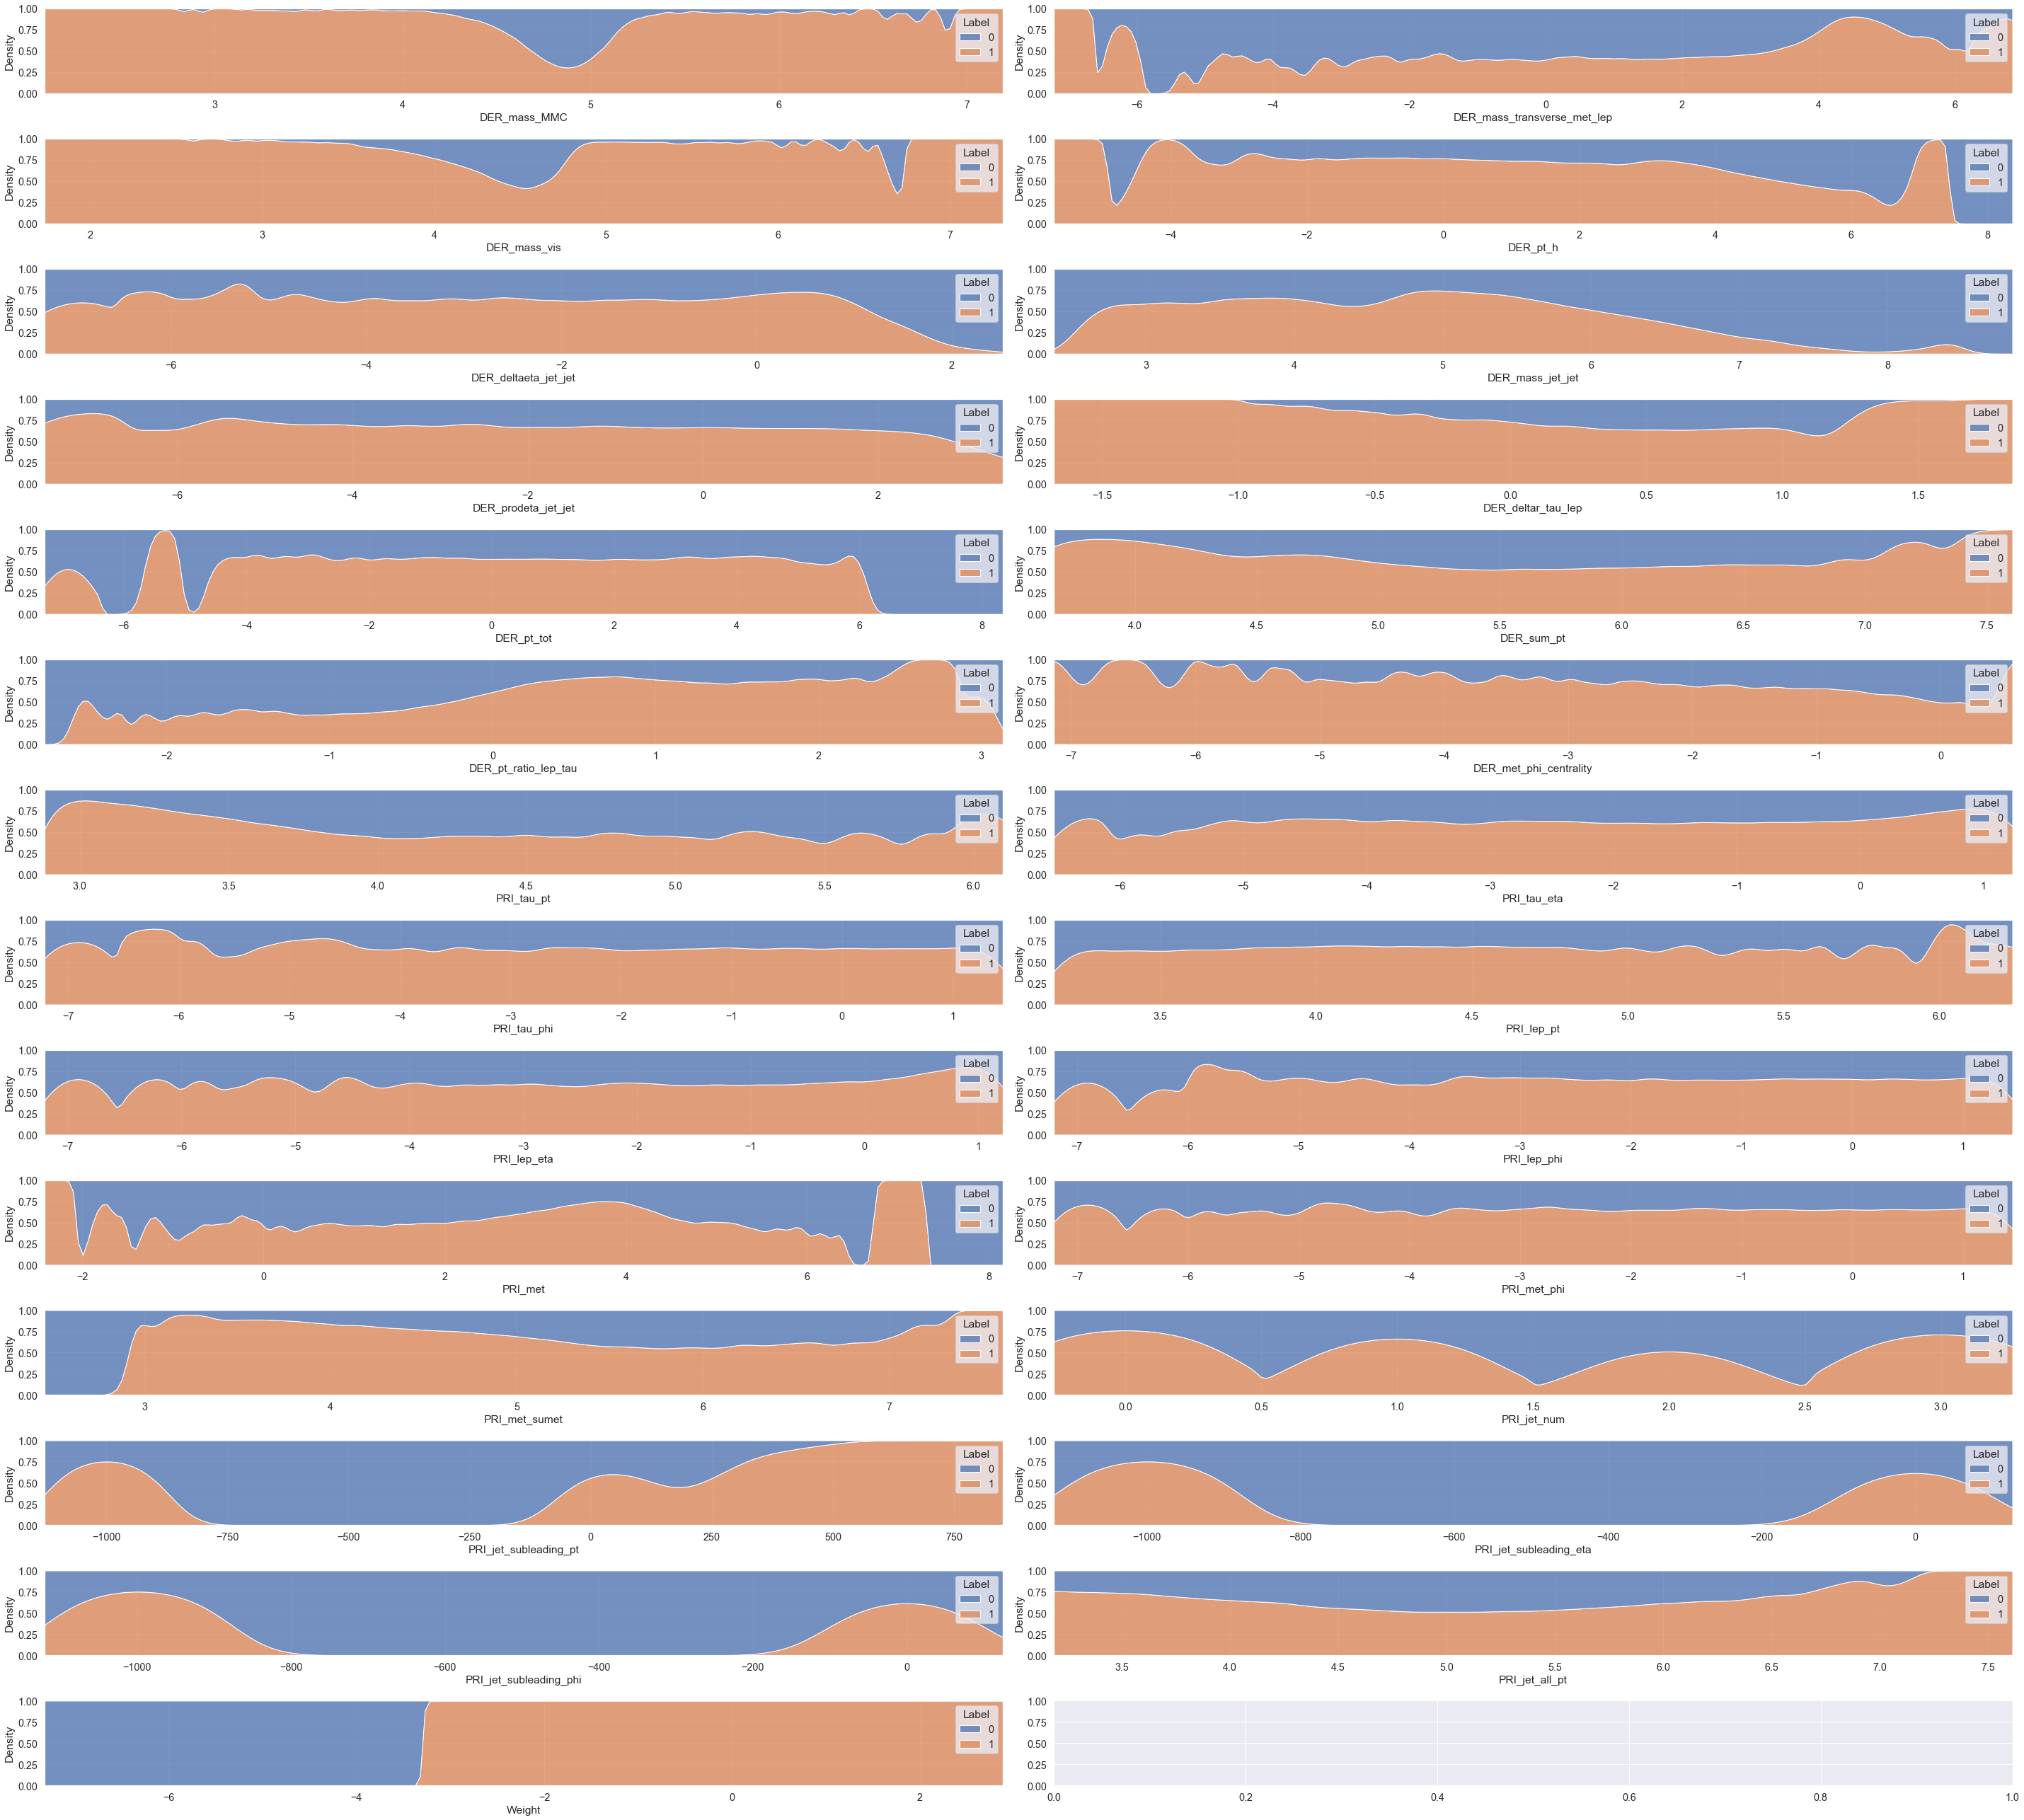

In [80]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(14, 2, figsize=(40, 36))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(feat):
  plot = sns.kdeplot(data=train, x=c, hue='Label', multiple='fill', ax=axes[i])
plt.tight_layout()

In [81]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [82]:
df.fillna(-999, inplace=True)

In [83]:
df1=df.drop('Label',axis=1)

In [84]:
def run_model(clf):
  """
  Function to fit the classifier, generate predictions and calculate f1_score.
  params: clf - The classifier which needs to be implemented
  """

  # Define Model
  clf = clf

  # Fit Model
  clf.fit(X_trn, y_trn)

  # Obtain Predictions
  preds_val = clf.predict(X_val)

  # Evaluate Model
  metric = f1_score(y_val, preds_val)
  print(f"f1 score: {metric}")
  # get importance
  importance = clf.coef_[0]
# summarize feature importance
  for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()

In [85]:
# Split train and validation data
trn, val = train_test_split(train, test_size=0.2, random_state = 1, stratify = train[Target])

# Input to our model will be the features
X_trn, X_val = trn[feat], val[feat]

# Output of our model will be the TARGET_COL
y_trn, y_val = trn[Target], val[Target]

# Features for the test data that we will be predicting
X_test = test[feat]

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

f1 score: 0.9881345191530276
Feature: 0, Score: -0.00040
Feature: 1, Score: 0.22597
Feature: 2, Score: -0.00642
Feature: 3, Score: -0.03659
Feature: 4, Score: -0.05949
Feature: 5, Score: -0.01955
Feature: 6, Score: -0.00270
Feature: 7, Score: -0.02090
Feature: 8, Score: 0.02314
Feature: 9, Score: 0.00918
Feature: 10, Score: 0.14568
Feature: 11, Score: -0.00051
Feature: 12, Score: -0.09131
Feature: 13, Score: -0.00074
Feature: 14, Score: -0.00118
Feature: 15, Score: 0.05437
Feature: 16, Score: -0.00058
Feature: 17, Score: -0.00095
Feature: 18, Score: 0.06341
Feature: 19, Score: -0.00045
Feature: 20, Score: 0.03037
Feature: 21, Score: 0.04461
Feature: 22, Score: 0.08467
Feature: 23, Score: -0.00691
Feature: 24, Score: -0.00160
Feature: 25, Score: 0.00211
Feature: 26, Score: 2.79871


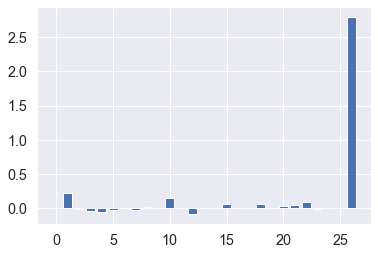

In [88]:
run_model(LogisticRegression(random_state = 42))

###### We will again build a classification model based on the feature importance. 
